In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
df = pd.read_csv('10_14_integrated_counts.csv').set_index('sample').astype(float)
df.head()

,pre-B cells,pro-B cells,Monocytes,Neutrophils,T cells,NK cells,Dendritic cells,B cells,Macrophages 1,Macrophages 2,...,MPP4,PreNeu,Imm Neu1,Imm Neu2,Imm Neu3,Mature Neu1,Mature Neu2,Mature Neu3,Unknown,Total
sample,,,,,,,,,,,,,,,,,,,,,
GFP Integrated,77.0,498.0,3274.0,909.0,734.0,428.0,192.0,2426.0,0.0,3759.0,...,0.0,0.0,0.0,993.0,0.0,0.0,5285.0,8112.0,126.0,43812.0
1_GFP-1,13.0,103.0,891.0,132.0,200.0,108.0,89.0,399.0,0.0,35.0,...,0.0,0.0,0.0,237.0,0.0,0.0,1377.0,2622.0,28.0,11667.0
2_GFP-2,44.0,276.0,1275.0,305.0,143.0,131.0,48.0,1234.0,0.0,33.0,...,0.0,0.0,0.0,384.0,0.0,0.0,1848.0,2761.0,60.0,14174.0
3_GFP-3,20.0,119.0,1108.0,472.0,391.0,189.0,55.0,793.0,0.0,3691.0,...,0.0,0.0,0.0,372.0,0.0,0.0,2060.0,2729.0,38.0,17971.0
RBD Integrated,0.0,666.0,4001.0,1099.0,900.0,137.0,184.0,3925.0,0.0,157.0,...,0.0,0.0,0.0,604.0,0.0,0.0,2468.0,10866.0,0.0,37534.0


In [3]:
df.columns.tolist()

['pre-B cells',
 'pro-B cells',
 'Monocytes',
 'Neutrophils',
 'T cells',
 'NK cells',
 'Dendritic cells',
 'B cells',
 'Macrophages 1',
 'Macrophages 2',
 'Megakaryocyte',
 'Erythroid cell',
 'Basophil',
 'LTHSC',
 'MPP',
 'MPP Ly-I',
 'MPP Ly-II',
 'MEP',
 'CMP',
 'GMP',
 'CLP',
 'LMPP',
 'MPP2',
 'MPP3',
 'MPP4',
 'PreNeu',
 'Imm Neu1',
 'Imm Neu2',
 'Imm Neu3',
 'Mature Neu1',
 'Mature Neu2',
 'Mature Neu3',
 'Unknown',
 'Total']

In [4]:
df_sub = pd.DataFrame()
df_sub.index = df.index
df_sub['B cell precursors'] = df.loc[:, ['pre-B cells', 'pro-B cells']].sum(axis=1) 
df_sub['Monocytes'] = df['Monocytes']
df_sub['Neutrophils'] = df['Neutrophils']
df_sub['T cells'] = df['T cells']
df_sub['NK cells'] = df['NK cells']
df_sub['Dendritic cells'] = df['Dendritic cells']
df_sub['B cells'] = df['B cells']
df_sub['Macrophages'] = df.loc[:, ['Macrophages 1', 'Macrophages 2']].sum(axis=1)
df_sub['Megakaryocyte'] = df['Megakaryocyte']
df_sub['Erythroid cell'] = df['Erythroid cell']
df_sub['Basophil'] = df['Basophil']
df_sub['HSC'] = df['LTHSC']
df_sub['MEP'] = df['MEP']
df_sub['CMP'] = df['CMP']
df_sub['GMP'] = df['GMP']
df_sub['CLP'] = df['CLP']
df_sub['MPP'] = df.loc[:, ['MPP','MPP Ly-I','MPP Ly-II', 'LMPP','MPP2','MPP3','MPP4']].sum(axis=1)
df_sub['PreNeu'] = df['PreNeu']
df_sub['Imm Neu'] = df.loc[:, ['Imm Neu1','Imm Neu2','Imm Neu3']].sum(axis=1)
df_sub['Mature Neu'] = df.loc[:, ['Mature Neu1','Mature Neu2','Mature Neu3']].sum(axis=1)
df_sub['Unknown'] = df['Unknown']
df_sub['Total'] = df['Total']
df_sub.head()

,B cell precursors,Monocytes,Neutrophils,T cells,NK cells,Dendritic cells,B cells,Macrophages,Megakaryocyte,Erythroid cell,...,MEP,CMP,GMP,CLP,MPP,PreNeu,Imm Neu,Mature Neu,Unknown,Total
sample,,,,,,,,,,,,,,,,,,,,,
GFP Integrated,575.0,3274.0,909.0,734.0,428.0,192.0,2426.0,3759.0,12890.0,1675.0,...,199.0,0.0,317.0,0.0,1918.0,0.0,993.0,13397.0,126.0,43812.0
1_GFP-1,116.0,891.0,132.0,200.0,108.0,89.0,399.0,35.0,4146.0,369.0,...,71.0,0.0,65.0,0.0,782.0,0.0,237.0,3999.0,28.0,11667.0
2_GFP-2,320.0,1275.0,305.0,143.0,131.0,48.0,1234.0,33.0,4193.0,732.0,...,63.0,0.0,95.0,0.0,549.0,0.0,384.0,4609.0,60.0,14174.0
3_GFP-3,139.0,1108.0,472.0,391.0,189.0,55.0,793.0,3691.0,4551.0,574.0,...,65.0,0.0,157.0,0.0,587.0,0.0,372.0,4789.0,38.0,17971.0
RBD Integrated,666.0,4001.0,1099.0,900.0,137.0,184.0,3925.0,157.0,4023.0,1887.0,...,251.0,0.0,282.0,0.0,5428.0,0.0,604.0,13334.0,0.0,37534.0


In [5]:
df_int = df_sub.loc[:, df_sub.sum() != 0].loc[[i for i in df_sub.index if 'Integrated' in i]]
df_int

,B cell precursors,Monocytes,Neutrophils,T cells,NK cells,Dendritic cells,B cells,Macrophages,Megakaryocyte,Erythroid cell,Basophil,HSC,MEP,GMP,MPP,PreNeu,Imm Neu,Mature Neu,Unknown,Total
sample,,,,,,,,,,,,,,,,,,,,
GFP Integrated,575.0,3274.0,909.0,734.0,428.0,192.0,2426.0,3759.0,12890.0,1675.0,0.0,0.0,199.0,317.0,1918.0,0.0,993.0,13397.0,126.0,43812.0
RBD Integrated,666.0,4001.0,1099.0,900.0,137.0,184.0,3925.0,157.0,4023.0,1887.0,0.0,656.0,251.0,282.0,5428.0,0.0,604.0,13334.0,0.0,37534.0
G1C Integrated,1492.0,6677.0,2089.0,2614.0,477.0,1164.0,6435.0,346.0,1436.0,4261.0,222.0,1078.0,267.0,834.0,4772.0,157.0,785.0,9610.0,0.0,44716.0


In [6]:
df_int['Unknown']/df_int['Total']

sample
GFP Integrated    0.002876
RBD Integrated    0.000000
G1C Integrated    0.000000
dtype: float64

In [7]:
df_int

,B cell precursors,Monocytes,Neutrophils,T cells,NK cells,Dendritic cells,B cells,Macrophages,Megakaryocyte,Erythroid cell,Basophil,HSC,MEP,GMP,MPP,PreNeu,Imm Neu,Mature Neu,Unknown,Total
sample,,,,,,,,,,,,,,,,,,,,
GFP Integrated,575.0,3274.0,909.0,734.0,428.0,192.0,2426.0,3759.0,12890.0,1675.0,0.0,0.0,199.0,317.0,1918.0,0.0,993.0,13397.0,126.0,43812.0
RBD Integrated,666.0,4001.0,1099.0,900.0,137.0,184.0,3925.0,157.0,4023.0,1887.0,0.0,656.0,251.0,282.0,5428.0,0.0,604.0,13334.0,0.0,37534.0
G1C Integrated,1492.0,6677.0,2089.0,2614.0,477.0,1164.0,6435.0,346.0,1436.0,4261.0,222.0,1078.0,267.0,834.0,4772.0,157.0,785.0,9610.0,0.0,44716.0


In [8]:
df_int['Total'] = df_int['Total'] - df_int['Unknown']
df_int.drop(columns=['Unknown'], inplace=True)

In [9]:
df_prop = df_int.iloc[:,:-1].div(df_int['Total'], axis=0).reset_index()
df_prop['sample'] = [i.split(' ')[0] for i in df_prop['sample']]
df_prop

,sample,B cell precursors,Monocytes,Neutrophils,T cells,NK cells,Dendritic cells,B cells,Macrophages,Megakaryocyte,Erythroid cell,Basophil,HSC,MEP,GMP,MPP,PreNeu,Imm Neu,Mature Neu
0,GFP,0.013162,0.074944,0.020808,0.016802,0.009797,0.004395,0.055533,0.086046,0.295060,0.038342,0.000000,0.000000,0.004555,0.007256,0.043904,0.000000,0.022730,0.306666
1,RBD,0.017744,0.106597,0.029280,0.023978,0.003650,0.004902,0.104572,0.004183,0.107183,0.050274,0.000000,0.017477,0.006687,0.007513,0.144616,0.000000,0.016092,0.355251
2,G1C,0.033366,0.149320,0.046717,0.058458,0.010667,0.026031,0.143908,0.007738,0.032114,0.095290,0.004965,0.024108,0.005971,0.018651,0.106718,0.003511,0.017555,0.214912


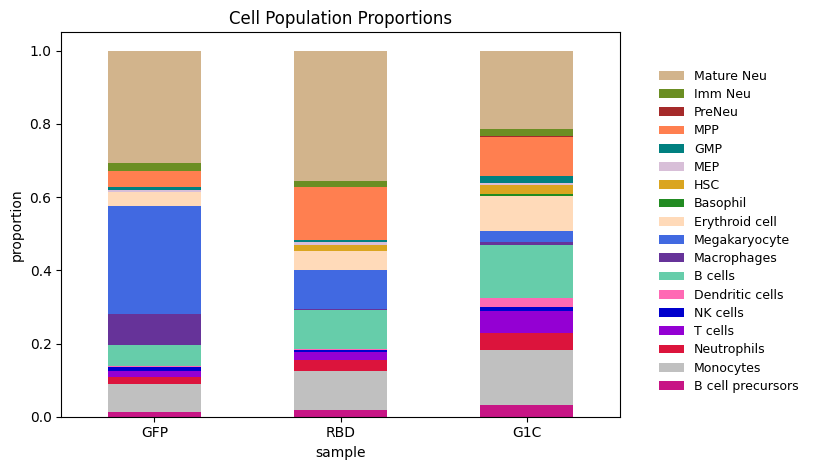

In [10]:
plot_colors = ['mediumvioletred', 'silver', 'crimson','darkviolet', 'mediumblue', 'hotpink',\
               'mediumaquamarine', 'rebeccapurple', 'royalblue', 'peachpuff', 'forestgreen',\
              'goldenrod','thistle','teal', 'coral', 'brown', 'olivedrab', 'tan']

df_prop.plot(x='sample', kind='bar', stacked=True,
        title='Cell Population Proportions', color=plot_colors)
plt.legend(bbox_to_anchor=(1.05, 0.125), loc='upper left', labelspacing=-2.5, frameon=False, fontsize=9.0)
plt.xticks(rotation=360)
plt.ylabel('proportion')
plt.tight_layout()
plt.show()

In [11]:
# https://petercbsmith.github.io/color-tutorial.html
# mcolors._colors_full_map.keys()
# mcolors.CSS4_COLORS